# Investigate SHAP for classification interpretation based on numerical features

## Import Libraries

### Import Scikit learn libraries for classification, partial dependence and utility functions

conda install -c conda-forge sklearn 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import f1_score
import pandas as pd

### Import SHAP for python

conda install -c conda-forge shapely 

In [2]:
import shap

/Users/binayak/opt/miniconda3/envs/bits/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download and prepare data

url: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [5]:
notes = pd.read_csv("/Users/binayak/Projects/BITS_MTech_Dissertation/data/data_banknote_authentication.txt", header=None, 
            names=['variance','skewness','kurtosis','entropy','class'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(notes.iloc[:,0:4], notes.iloc[:,4], test_size = 0.3, random_state=0)

## Train and Test Classifier Model

In [7]:
model = RandomForestClassifier()

In [8]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
f1_score(y_test,model.predict(X_test))

0.9889502762430938

#### f1_score suggests that the model has performed satisfactorily

#### Now we will leverage SHAP to attempt explain the model predictions

## Explore and experiment with SHAP

#### While the model predicts the output as 0 or 1, we will take the probability of output (1 in this case) as the output and based on that, check the marginal contribution of the input features towards the output

In [10]:
# To transform the output and suite the input requirements of shap, we will extract the probability of predicting 1
f = lambda x: model.predict_proba(x)[:,1]

In [11]:
# Quick test
i = 0
print ("Predicted probability for [{}] item to be [1] is [{}]".format(i,f([X_test.iloc[i]])))
print ("Actual output value of [{}] item is [{}]".format(i,y_test.iloc[i]))

Predicted probability for [0] item to be [1] is [[0.98]]
Actual output value of [0] item is [1]


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


### Create Partial Dependence / Individual Contribution Plot
#### Diagram below shows that expected value of output probablity (fake note), expected value of variance and their inverse relation over the range of values of variance

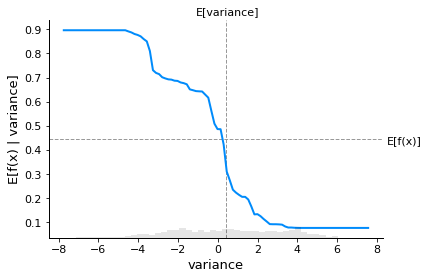

In [323]:
shap.partial_dependence_plot(
    "variance", f, notes.iloc[:,0:4], ice=False,
    model_expected_value=True, feature_expected_value=True
)

### Initialize and train the SHAP explained with shaply values of different features at different points

In [299]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(f, notes.iloc[:,0:4])
shap_values = explainer(notes.iloc[:,0:4])

Exact explainer: 1373it [00:40, 25.97it/s]                          


### Demonstrate the partial dependence for a particular sample feature and show shaply value for the feature

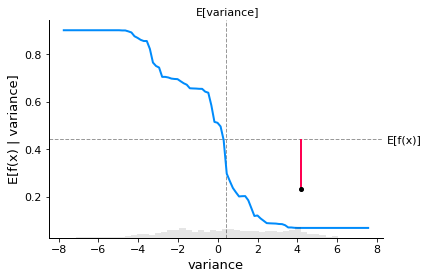

In [300]:
# make a standard partial dependence plot
sample_ind = 40
shap.partial_dependence_plot(
    "variance", f, notes.iloc[:,0:4], model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

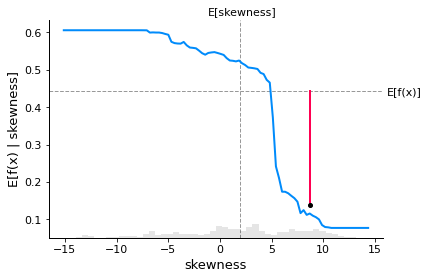

In [301]:
# make a standard partial dependence plot
sample_ind = 40
shap.partial_dependence_plot(
    "skewness", f, notes.iloc[:,0:4], model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

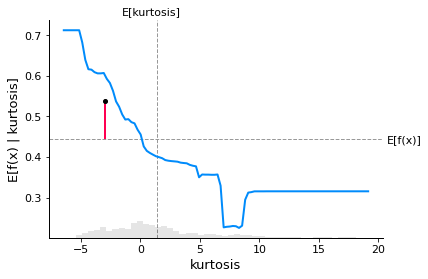

In [302]:
# make a standard partial dependence plot
sample_ind = 40
shap.partial_dependence_plot(
    "kurtosis", f, notes.iloc[:,0:4], model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

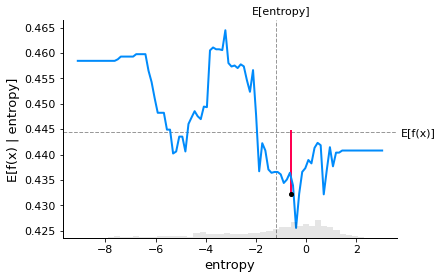

In [306]:
# make a standard partial dependence plot
sample_ind = 40
shap.partial_dependence_plot(
    "entropy", f, notes.iloc[:,0:4], model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

### Display / Explain effect of individual feature towards prediction outcome at a particular point in feature space
#### The diagram clearly shows that though kurtosis tends to push the output beyond the expected value (0.445) but the additive effect of individual contribution of entropy, kurtosis and skewness pulls it down towards 0 (0.01).
#### Hence the most dominant contribution to the outcome is affected by skewness (-0.31) and then variance (-0.21)

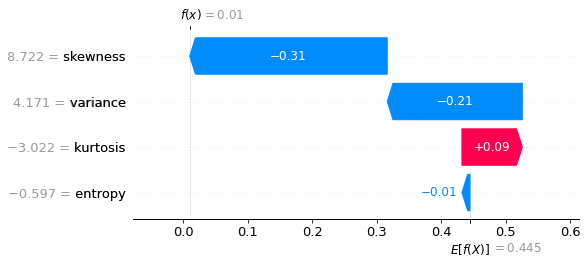

In [304]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

### Verifying the explaination graph above against the data

In [327]:
# Feature values
notes.iloc[sample_ind,0:4]

variance    4.17110
skewness    8.72200
kurtosis   -3.02240
entropy    -0.59699
Name: 40, dtype: float64

In [328]:
# Predicted probability of 1 at chosen sample
f([notes.iloc[sample_ind,0:4]])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([0.])

In [329]:
# Actual value of target at chosen sample
notes.iloc[sample_ind,4]

0